In [1]:
import pandas as pd
df=pd.read_csv('~/Downloads/Dillards_POS/skstinfo.csv')
df

,3,102,123.36,440.00,0
0,3,103,123.36,440.00,0
1,3,104,123.36,440.00,0
2,3,202,123.36,440.00,0
3,3,203,123.36,440.00,0
4,3,204,123.36,440.00,0
...,...,...,...,...,...
39230140,9999997,2007,15.00,19.50,0
39230141,9999997,2707,15.00,9.75,0
39230142,9999997,3307,15.00,19.50,0
39230143,9999997,7507,15.00,19.50,0


Techically, we should have four columns here: SKU, STORE, COST, RETAIL. 
SKU is Stock Keeping Unit number of the stock item, which should refers to the first column, i guess.
STORE is store numbers, which can be the second column.
COST is The cost of the stock item, which can be the third column.
RETAIL is The retail price of the stock item, which can be the fourth column.
We can check if the last column is all zeros or not. I want to delete that columns as each row has 0.

In [2]:
if (df['0'] != 0).any():
    print("There are non-zero values in the last column")

There are non-zero values in the last column


In [3]:
new_first_row = pd.DataFrame({'3': [3], '102': [102], '123.36': [123.36], '440.00': [440.00], '0': [0]})

# Create a DataFrame with the remaining rows as the data
df = df.iloc[0:]

# Concatenate the new first row and the data
df = pd.concat([new_first_row, df], ignore_index=True)

# Display the updated DataFrame with the new first row
print(df)

                3   102  123.36  440.00  0
0               3   102  123.36  440.00  0
1               3   103  123.36  440.00  0
2               3   104  123.36  440.00  0
3               3   202  123.36  440.00  0
4               3   203  123.36  440.00  0
...           ...   ...     ...     ... ..
39230141  9999997  2007   15.00   19.50  0
39230142  9999997  2707   15.00    9.75  0
39230143  9999997  3307   15.00   19.50  0
39230144  9999997  7507   15.00   19.50  0
39230145  9999997  7907   15.00   19.50  0

[39230146 rows x 5 columns]


In [4]:
df=df.rename(columns={'3': 'SKU','102':'Store', '123.36':'Cost', '440.00':'Retail'}, inplace=False)
df

,SKU,Store,Cost,Retail,0
0,3,102,123.36,440.00,0
1,3,103,123.36,440.00,0
2,3,104,123.36,440.00,0
3,3,202,123.36,440.00,0
4,3,203,123.36,440.00,0
...,...,...,...,...,...
39230141,9999997,2007,15.00,19.50,0
39230142,9999997,2707,15.00,9.75,0
39230143,9999997,3307,15.00,19.50,0
39230144,9999997,7507,15.00,19.50,0


In [5]:
data = df.drop(df.columns[-1], axis=1)
data

,SKU,Store,Cost,Retail
0,3,102,123.36,440.00
1,3,103,123.36,440.00
2,3,104,123.36,440.00
3,3,202,123.36,440.00
4,3,203,123.36,440.00
...,...,...,...,...
39230141,9999997,2007,15.00,19.50
39230142,9999997,2707,15.00,9.75
39230143,9999997,3307,15.00,19.50
39230144,9999997,7507,15.00,19.50


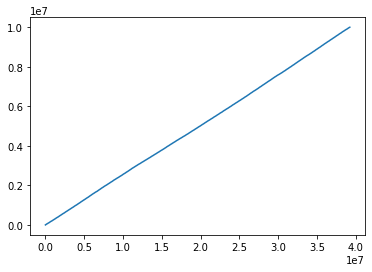

In [6]:
import matplotlib.pyplot as plt
plt.plot(df['SKU'])

(array([5233881., 3732662., 5063167., 4597599., 4663693., 2762224.,
        2954497., 4068129., 3547714., 2606580.]),
 array([ 100. , 1080.9, 2061.8, 3042.7, 4023.6, 5004.5, 5985.4, 6966.3,
        7947.2, 8928.1, 9909. ]),
 <BarContainer object of 10 artists>)

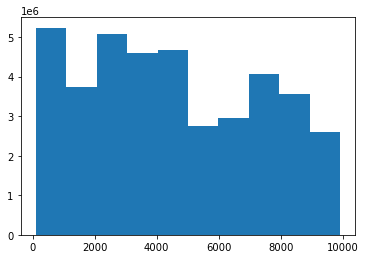

In [8]:
plt.hist(df['Store'])